In [1]:
import pandas as pd
from FinMetrics import Metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import numpy as np

import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
clf_lr = LinearRegression()
clf_rf = RandomForestRegressor(n_estimators=100, random_state=2367)

In [4]:
'''
df = pd.read_csv('stocks00-1000.csv')
_ = pd.read_csv('stocks2000-.csv')
df = pd.concat([df, _], axis=0)
_.to_csv('stock1000-2000.csv')
df = pd.concat([df, _], axis=0)
df = pd.read_csv('Stock Data First Tranche.csv')
_ = pd.read_csv('Missing Tick Stock Data.csv')
df = pd.concat([df, _], axis=0)
'''
df = pd.read_csv('Full Stock Data.csv')

In [5]:
#df.to_csv('Full Stock Data.csv')

In [6]:
len(set(df['ticker'].tolist()))

1931

In [7]:
'''
d = Metrics()
ticks = d.stock_df['ticker'].unique().tolist()
missing_ticks = pd.DataFrame({'ticks':[i for i in ticks if i not in df['ticker'].tolist()]})
missing_ticks.to_csv('missing_ticks.csv', index=False)
'''

"\nd = Metrics()\nticks = d.stock_df['ticker'].unique().tolist()\nmissing_ticks = pd.DataFrame({'ticks':[i for i in ticks if i not in df['ticker'].tolist()]})\nmissing_ticks.to_csv('missing_ticks.csv', index=False)\n"

In [9]:
df = df.sort_values(['ticker', 'date'])
df = df.drop_duplicates()
#df['price_chg'] = df.groupby('ticker')['Close'].diff()
#df['Revenue_D1'] = df.groupby('ticker')['Revenue'].diff(4)
#df['NX_D1'] = df.groupby('ticker')['Net Income'].diff(4)
#df['Revenue_D1_STD'] = df.groupby('ticker')['Revenue_D1'].transform(lambda x: x.rolling(8, 4).std())
#df['NX_D1_STD'] = df.groupby('ticker')['NX_D1'].transform(lambda x: x.rolling(8, 4).mean())
#df['price_chg'] = df.groupby('ticker')['Close'].diff()
#df['price_pctchg'] = df.groupby('ticker')['Close'].pct_change()

#df['price_pctchg_1Q_future'] = df.groupby('ticker')['Close'].pct_change(1).shift(-1)
#df['price_pctchg_1YR_future'] = df.groupby('ticker')['Close'].pct_change(4).shift(-4)
#df['price_pctchg_5YR_future'] = df.groupby('ticker')['Close'].pct_change(20).shift(-20)
#df['price_pctchg_10YR_future'] = df.groupby('ticker')['Close'].pct_change(40).shift(-40)








df['price_5YR_future'] = df['Close'].shift(-20)





df = df.sort_values(['ticker', 'date'])

df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
#df['Year End'] =  df['date'].eq(df.groupby(['ticker', 'Year'])['date'].transform('max'))

'''
df.loc[df.ticker=='AAPL'][['ticker', 'date', 'Year End',
                          'Close', 'price_chg', 
                          'Revenue', 'Revenue_D1', 'Revenue_D1_STD',
                          'Net Income', 'NX_D1', 'NX_D1_STD', 'price_pctchg_1Q_future',
                           'price_pctchg_1YR_future', 'price_pctchg_5YR_future', 'price_pctchg_10YR_future']]
'''

drop_cols = ['Unamed: 0','Unamed: 1', 'date_asdate', 'price_date', 'price_date_asdate', 
             'days_between_financials_price',
            'Revenue_D1','NX_D1','Revenue_D1_STD','NX_D1_STD']
ratios = [
    ['Research And Development Expenses', 'Net Income'],
    ['Close', 'Basic EPS'],
    ['Net Income', 'Revenue'],
    ['long_term_debt', 'Net Income'],
    ['Cash On Hand', 'Revenue']
    []
]
pct = ['shares_outstanding', 'ROE - Return On Equity','ROA - Return On Assets']
pct_std = ['Revenue', 'ROE - Return On Equity','ROA - Return On Assets']

list(df.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'date',
 'ticker',
 'Revenue',
 'Cost Of Goods Sold',
 'Gross Profit',
 'Research And Development Expenses',
 'SG&A Expenses',
 'Other Operating Income Or Expenses',
 'Operating Expenses',
 'Operating Income',
 'Total Non-Operating Income/Expense',
 'Pre-Tax Income',
 'Income Taxes',
 'Income After Taxes',
 'Other Income',
 'Income From Continuous Operations',
 'Income From Discontinued Operations',
 'Net Income',
 'EBITDA',
 'EBIT',
 'Basic Shares Outstanding',
 'Shares Outstanding',
 'Basic EPS',
 'EPS - Earnings Per Share',
 'Net Income/Loss',
 'Total Depreciation And Amortization - Cash Flow',
 'Other Non-Cash Items',
 'Total Non-Cash Items',
 'Change In Accounts Receivable',
 'Change In Inventories',
 'Change In Accounts Payable',
 'Change In Assets/Liabilities',
 'Total Change In Assets/Liabilities',
 'Cash Flow From Operating Activities',
 'Net Change In Property, Plant, And Equipment',
 'Net Change In Intangible Assets',
 'Net Acquisitions/Dives

In [72]:
df.head()

,Unnamed: 0,Unnamed: 0.1,date,ticker,Revenue,Cost Of Goods Sold,Gross Profit,Research And Development Expenses,SG&A Expenses,Other Operating Income Or Expenses,Operating Expenses,Operating Income,Total Non-Operating Income/Expense,Pre-Tax Income,Income Taxes,Income After Taxes,Other Income,Income From Continuous Operations,Income From Discontinued Operations,Net Income,EBITDA,EBIT,Basic Shares Outstanding,Shares Outstanding,Basic EPS,EPS - Earnings Per Share,Net Income/Loss,Total Depreciation And Amortization - Cash Flow,Other Non-Cash Items,Total Non-Cash Items,Change In Accounts Receivable,Change In Inventories,Change In Accounts Payable,Change In Assets/Liabilities,Total Change In Assets/Liabilities,Cash Flow From Operating Activities,"Net Change In Property, Plant, And Equipment",Net Change In Intangible Assets,Net Acquisitions/Divestitures,Net Change In Short-term Investments,Net Change In Long-Term Investments,Net Change In Investments - Total,Investing Activities - Other,Cash Flow From Investing Activities,Net Long-Term Debt,Net Current Debt,Debt Issuance/Retirement Net - Total,Net Common Equity Issued/Repurchased,Net Total Equity Issued/Repurchased,Total Common And Preferred Stock Dividends Paid,Financial Activities - Other,Cash Flow From Financial Activities,Net Cash Flow,Stock-Based Compensation,Common Stock Dividends Paid,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,Inventory Turnover Ratio,Receiveable Turnover,Days Sales In Receivables,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Book Value Per Share,Operating Cash Flow Per Share,Free Cash Flow Per Share,Cash On Hand,Receivables,Inventory,Pre-Paid Expenses,Other Current Assets,Total Current Assets,"Property, Plant, And Equipment",Long-Term Investments,Goodwill And Intangible Assets,Other Long-Term Assets,Total Long-Term Assets,Total Assets,Total Current Liabilities,Long Term Debt,Other Non-Current Liabilities,Total Long Term Liabilities,Total Liabilities,Common Stock Net,Retained Earnings (Accumulated Deficit),Comprehensive Income,Other Share Holders Equity,Share Holder Equity,Total Liabilities And Share Holders Equity,gross_prof,ebitda,shares_outstanding,long_term_debt,operating_income,net_income,eps,cash_on_hand,total_liabilities,share_holder_equity,total_assets,revenue,date_asdate,price_date,Close,price_date_asdate,days_between_financials_price,price_chg,Revenue_D1,NX_D1,Revenue_D1_STD,NX_D1_STD,Year,Year End,price_pctchg,price_pctchg_1Q_future,price_pctchg_1YR_future,price_pctchg_5YR_future,price_pctchg_10YR_future,p/e
0,32,NaN,2009-01-31,A,1166.0,577.0,589.0,169.0,396.0,NaN,565.0,24.0,3.0,27.0,-37.0,64.0,NaN,64.0,NaN,64.0,65.0,24.0,351.0,352.0,0.18,0.18,64.0,41.0,74.0,115.0,140.0,-22.0,-53.0,-85.0,-162.0,17.0,-34.0,NaN,-1.0,NaN,20.0,20.0,4.0,-11.0,NaN,50.0,50.0,-99.0,-99.0,NaN,NaN,-49.0,-43.0,21.0,NaN,2.6619,0.4559,0.8573,50.5146,2.0583,2.0583,NaN,2.3156,5.4889,0.1628,0.8809,1.8508,48.6278,2.4893,3.7669,0.8936,1.3545,7.4522,0.0483,-0.0483,1380.0,630.0,655.0,NaN,343.0,3008.0,831.0,169.0,872.0,2282.0,4154.0,7162.0,1130.0,2154.0,984.0,3461.0,4591.0,6.0,2855.0,-154.0,NaN,2571.0,7162.0,589.0,65.0,352.0,2154.0,24.0,64.0,0.18,1380.0,4591.0,2571.0,7162.0,1166.0,2009-01-31,2009-01-30,12.932761,2009-01-30,1 days,NaN,NaN,NaN,NaN,NaN,2009,False,NaN,0.009956,0.550332,2.216261,4.880415,71.848672
1,520,NaN,2009-04-30,A,1091.0,561.0,530.0,170.0,407.0,NaN,577.0,-47.0,-11.0,-58.0,43.0,-101.0,NaN,-101.0,NaN,-101.0,-7.0,-47.0,344.0,344.0,-0.29,-0.29,-101.0,40.0,80.0,120.0,63.0,35.0,-5.0,-9.0,118.0,137.0,-34.0,0.0,-1.0,0.0,12.0,12.0,6.0,-17.0,0.0,-50.0,-50.0,-31.0,-31.0,0.0,0.0,-81.0,38.0,18.0,0.0,2.6233,0.4710,0.8905,48.5793,-4.3080,-4.3080,NaN,-5.3162,-9.2576,0.1659,0.9227,1.9174,46.9386,-4.1753,-6.3843,-1.5359,-2.2086,7.0525,0.3994,0.2983,1412.0,569.0,608.0,NaN,294.0,2883.0,821.0,167.0,837.0,1868.0,3693.

In [10]:
df.loc[df.ticker=='NVDA']

,Unnamed: 0,Unnamed: 0.1,date,ticker,Revenue,Cost Of Goods Sold,Gross Profit,Research And Development Expenses,SG&A Expenses,Other Operating Income Or Expenses,...,Revenue_D1_STD,NX_D1_STD,Year,Year End,price_pctchg,price_pctchg_1Q_future,price_pctchg_1YR_future,price_pctchg_5YR_future,price_pctchg_10YR_future,p/e
56134,2,2.0,2009-01-31,NVDA,481.1399,339.4741,141.6658,211.779,86.440,NaN,...,NaN,NaN,2009,False,NaN,0.444025,0.935849,0.974843,17.081761,-30.576923
56135,390,390.0,2009-04-30,NVDA,664.2310,474.5350,189.6960,301.797,118.864,NaN,...,NaN,NaN,2009,False,0.444025,0.126307,0.368467,0.608885,14.766551,-31.027027
56136,802,802.0,2009-07-31,NVDA,776.5200,619.7970,156.7230,192.855,73.975,NaN,...,NaN,NaN,2009,False,0.126307,-0.075019,-0.289250,0.353442,12.048724,-68.052632
56137,1181,1181.0,2009-10-31,NVDA,903.2060,511.4230,391.7830,197.948,85.990,NaN,...,NaN,NaN,2009,True,-0.075019,0.286789,0.005017,0.633779,15.807693,59.800000
56138,1608,1608.0,2010-01-31,NVDA,982.4880,543.7670,438.7210,216.251,88.188,NaN,...,NaN,NaN,2010,False,0.286789,0.020793,0.554256,0.247563,14.362573,64.125000
56139,2020,2020.0,2010-04-30,NVDA,1001.8130,545.4360,456.3770,218.105,90.879,NaN,...,NaN,NaN,2010,False,0.020793,-0.415022,0.273074,0.413113,17.604710,65.458333
56140,2443,2443.0,2010-07-31,NVDA,811.2080,676.9160,134.2920,210.635,98.864,NaN,...,NaN,NaN,2010,False,-0.415022,0.307943,0.504897,1.170838,45.201305,-36.760000
56141,2855,2855.0,2010-10-31,NVDA,843.9120,451.8500,392.0620,204.527,83.752,NaN,...,260.927592,139.824750,2010,True,0.307943,0.990017,0.231281,1.360233,40.710481,80.133333
56142,3293,3293.0,2011-01-31,NVDA,886.3760,460.0170,426.3589,215.563,88.018,NaN,...,262.727212,119.974800,2011,False,0.990017,-0.163880,-0.382525,0.224498,20.721991,79.733333
56143,3710,3710.0,2011-04-30,NVDA,962.0390,477.5360,484.5030,231.524,98.117,NaN,...,246.632117,99.583167,2011,False,-0.163880,-0.308500,-0.350000,0.776500,29.019000,86.956522


In [11]:
ten_year = df.loc[df.Year.isin([2022, 2012] )]
ten_year = ten_year.loc[ten_year['Year End']==True]
ten_year = ten_year.sort_values(['ticker', 'date'])
ten_year = ten_year.drop_duplicates()
ten_year['price_chg'] = ten_year.groupby('ticker')['Close'].diff()
ten_year['price_pctchg'] = ten_year.groupby('ticker')['Close'].pct_change()


ten_year = ten_year.sort_values('price_pctchg', ascending=False)
ten_year.head(50)


,Unnamed: 0,Unnamed: 0.1,date,ticker,Revenue,Cost Of Goods Sold,Gross Profit,Research And Development Expenses,SG&A Expenses,Other Operating Income Or Expenses,...,Revenue_D1_STD,NX_D1_STD,Year,Year End,price_pctchg,price_pctchg_1Q_future,price_pctchg_1YR_future,price_pctchg_5YR_future,price_pctchg_10YR_future,p/e
77350,29361,29361.0,2022-12-31,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2022,True,53.552702,0.684202,NaN,NaN,NaN,NaN
56189,29015,29015.0,2022-10-31,NVDA,5931.0000,2754.0000,3177.0000,1945.000,631.0000,NaN,...,1434.524903,266.250000,2022,True,44.065109,0.447507,NaN,NaN,NaN,499.888893
76331,29037,29037.0,2022-12-31,TPL,152.7060,NaN,152.7060,NaN,15.2570,-10.0650,...,33.321208,33.789125,2022,True,42.874789,-0.274380,NaN,NaN,NaN,181.021620
4193,29126,29126.0,2022-12-31,AMD,5599.0000,3196.0000,2403.0000,1366.000,590.0000,5.0000,...,621.287776,-146.250000,2022,True,25.987499,0.513201,NaN,NaN,NaN,-2158.999900
24839,36725,NaN,2022-12-31,DQ,864.2522,195.3680,668.8842,2.738,43.9790,0.9030,...,320.196100,211.325762,2022,True,23.252513,0.213157,NaN,NaN,NaN,9.214797
79121,36550,NaN,2022-12-31,UI,493.5710,296.0100,197.5610,33.765,18.6430,NaN,...,92.470807,-20.534000,2022,True,21.531301,-0.006727,NaN,NaN,NaN,147.059139
53831,29166,29166.0,2022-12-31,NFLX,7852.0530,5404.1600,2447.8930,673.926,1224.0630,NaN,...,419.825519,216.316112,2022,True,21.293552,0.171595,NaN,NaN,NaN,2457.333375
27902,29429,29429.0,2022-12-31,EPAM,1231.3030,832.7282,398.5753,NaN,204.9520,NaN,...,104.501125,11.532000,2022,True,17.107182,-0.087691,NaN,NaN,NaN,121.836428
51498,36627,NaN,2022-12-31,MSCI,576.2079,102.3840,473.8239,29.026,105.7760,NaN,...,27.246057,33.593875,2022,True,14.010326,0.203195,NaN,NaN,NaN,172.925655
31033,29411,29411.0,2022-12-31,FICO,344.8700,76.5690,268.3010,36.633,92.9950,1.9410,...,21.631130,14.780375,2022,True,13.241733,0.173928,NaN,NaN,NaN,153.482056


In [30]:
ten_year.shape

(99, 120)

In [20]:
ten_year.sort_values('price_chg', ascending=False).head(20)

,date,ticker,Revenue,Cost Of Goods Sold,Gross Profit,Research And Development Expenses,SG&A Expenses,Other Operating Income Or Expenses,Operating Expenses,Operating Income,Total Non-Operating Income/Expense,Pre-Tax Income,Income Taxes,Income After Taxes,Other Income,Income From Continuous Operations,Income From Discontinued Operations,Net Income,EBITDA,EBIT,Basic Shares Outstanding,Shares Outstanding,Basic EPS,EPS - Earnings Per Share,Cash On Hand,Receivables,Inventory,Pre-Paid Expenses,Other Current Assets,Total Current Assets,"Property, Plant, And Equipment",Long-Term Investments,Goodwill And Intangible Assets,Other Long-Term Assets,Total Long-Term Assets,Total Assets,Total Current Liabilities,Long Term Debt,Other Non-Current Liabilities,Total Long Term Liabilities,Total Liabilities,Common Stock Net,Retained Earnings (Accumulated Deficit),Comprehensive Income,Other Share Holders Equity,Share Holder Equity,Total Liabilities And Share Holders Equity,Net Income/Loss,Total Depreciation And Amortization - Cash Flow,Other Non-Cash Items,Total Non-Cash Items,Change In Accounts Receivable,Change In Inventories,Change In Accounts Payable,Change In Assets/Liabilities,Total Change In Assets/Liabilities,Cash Flow From Operating Activities,"Net Change In Property, Plant, And Equipment",Net Change In Intangible Assets,Net Acquisitions/Divestitures,Net Change In Short-term Investments,Net Change In Long-Term Investments,Net Change In Investments - Total,Investing Activities - Other,Cash Flow From Investing Activities,Net Long-Term Debt,Net Current Debt,Debt Issuance/Retirement Net - Total,Net Common Equity Issued/Repurchased,Net Total Equity Issued/Repurchased,Total Common And Preferred Stock Dividends Paid,Financial Activities - Other,Cash Flow From Financial Activities,Net Cash Flow,Stock-Based Compensation,Common Stock Dividends Paid,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,Inventory Turnover Ratio,Receiveable Turnover,Days Sales In Receivables,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Book Value Per Share,Operating Cash Flow Per Share,Free Cash Flow Per Share,revenue,gross_prof,operating_income,ebitda,net_income,eps,shares_outstanding,total_assets,cash_on_hand,long_term_debt,total_liabilities,share_holder_equity,date_asdate,price_date,Close,price_date_asdate,days_between_financials_price,price_chg
35027,2022-11-30,AZO,3985.0670,1990.4450,1994.6220,NaN,1271.589,NaN,1271.5890,723.0330,-57.723,665.310,125.992,539.3180,NaN,539.3180,NaN,539.318,834.1910,723.0330,19.0070,19.6450,28.37,27.45,269.790,501.798,5607.690,NaN,253.840,6633.118,5194.546,NaN,302.645,210.032,8682.815,15315.930,8708.989,6328.344,729.008,10444.870,19153.860,0.208,-790.749,-297.265,NaN,-3837.923,15315.930,539.318,111.158,113.821,224.9790,4.100,-39.308,NaN,-16.030,29.290,793.587,-104.317,NaN,NaN,-7.096,-2.474,-9.570,NaN,-113.887,184.3020,NaN,184.3020,-859.170,-859.170,NaN,-0.783,-675.651,5.410,19.005,NaN,0.7616,2.5411,-1.6489,50.0524,18.1436,18.1436,NaN,16.6951,13.5335,0.2602,0.3549,7.9416,11.3328,-14.0523,-13.0252,3.5213,21.6557,-204.1774,40.3964,35.0863,3985.0,1995.0,723.0,834.0,539.0,27.45,20.0,15316.0,270.0,6328.0,19154.0,-3838.0,2022-11-30,2021-10-29,1784.839966,2021-10-29,397 days,1401.069977
35019,2022-11-30,FDS,504.8150,227.0420,277.7730,NaN,105.596,-0.282,105.8780,171.8950,-14.010,157.885,21.087,136.7980,NaN,136.7980,NaN,136.798,207.5890,171.8950,38.1220,38.9140,3.59,3.52,469.714,227.489,NaN,132.004,NaN,829.207,79.296,NaN,2857.829,53.430,3148.333,3977.540,384.021,1859.096,38.643,2119.391,2503.412,0.418,1282.527,-93.059,NaN,1474.128,3977.540,136.798,35.694,11.712,47.4060,-23.647,NaN,NaN,-12.864,-77.568,106.636,-17.960,NaN,NaN,NaN,-9.892,-9.892,NaN,-27.852,-125.0000,NaN,-125.0000,23.423,23.423,-33.665,-10.990,-146.232,-66.131,12.175,-33.665,2.1593,0.5577,1.2612,55.0247,34.0511,34.0511,

## Stock Market Wide Trends

### Total Revenue

<AxesSubplot: xlabel='Year'>

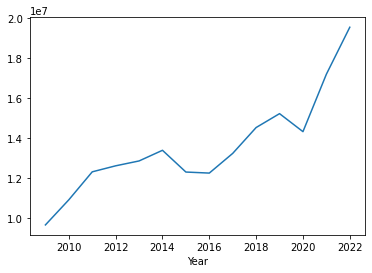

In [17]:
revs = df.groupby('Year')['Revenue'].sum()
revs = revs.loc[revs.index.min(): 2022]
revs.plot()

### p/e Median

<AxesSubplot: xlabel='Year'>

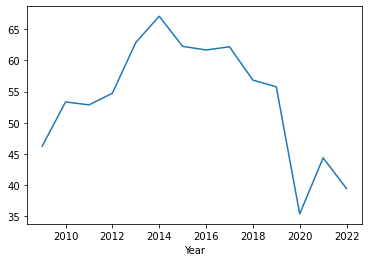

In [20]:
revs = df.groupby('Year')['p/e'].median()
revs = revs.loc[revs.index.min(): 2022]
revs.plot()

##  EDA

In [62]:
df2012.corr()['price_pctchg_10YR_future'].sort_values(ascending=False).head(20)

price_pctchg_10YR_future                           1.000000
price_pctchg_5YR_future                            0.590327
black_or_red                                       0.375736
price_pctchg_1YR_future                            0.341446
price_pctchg_1Q_future                             0.112368
Unnamed: 0.1                                       0.082116
price_pctchg                                       0.072379
Stock-Based Compensation                           0.070379
Research And Development Expenses                  0.063918
Net Change In Property, Plant, And Equipment       0.052785
Days Sales In Receivables                          0.052742
Total Common And Preferred Stock Dividends Paid    0.049215
Shares Outstanding                                 0.043535
Basic Shares Outstanding                           0.043437
Total Non-Operating Income/Expense                 0.038348
Common Stock Dividends Paid                        0.036942
Receiveable Turnover                    

In [63]:
df2012.corr()['price_pctchg_10YR_future'].sort_values(ascending=False).tail(20)

gross_prof                                   -0.034862
Total Non-Cash Items                         -0.035797
Total Liabilities And Share Holders Equity   -0.036579
Total Assets                                 -0.036579
total_assets                                 -0.039704
Cash Flow From Operating Activities          -0.043201
Total Long Term Liabilities                  -0.043628
Long Term Debt                               -0.045423
long_term_debt                               -0.045762
Share Holder Equity                          -0.046035
Operating Cash Flow Per Share                -0.046727
shares_outstanding                           -0.046968
Gross Margin                                 -0.050888
Close                                        -0.058539
Unnamed: 0                                   -0.062086
Property, Plant, And Equipment               -0.062590
share_holder_equity                          -0.067835
Book Value Per Share                         -0.070861
Year      

## Test Regression - 2012

In [64]:
df2012 = df.loc[(df['Year End']==True) & (df['Year']==2012)]
print(df2012.shape)

(1410, 128)


In [65]:
df2012 = df.loc[(df['Year End']==True) & (df['Year']==2012)]
df2012 = df2012.loc[df2012['price_pctchg_10YR_future'].isna()==False]
df2012 = df2012.fillna(0)
df2012 = df2012.reset_index(drop=True)
df2012['black_or_red'] = np.where(df2012['price_pctchg_10YR_future'] > 0, 1, 0)
print(df2012.shape)



(1132, 129)


### Regressors

In [66]:
#-- Split
train_size = 800
x_cols = df2012.columns[4:110]
y_cols = ['price_pctchg_10YR_future']

train_x, test_x, train_y, test_y = train_test_split(df2012[x_cols], df2012[y_cols], test_size=.3, random_state=32487)


print('Train Size: ', train_x.shape)
print('Test Size: ', test_x.shape)

Train Size:  (792, 106)
Test Size:  (340, 106)


In [67]:
#-- Train LR
model = clf_lr.fit(train_x, train_y)
preds = model.predict(train_x) 
train = pd.concat([train_x, train_y], axis=1)
train['predict'] = preds
preds = model.predict(test_x) 
test = pd.concat([test_x, test_y], axis=1)
test['predict'] = preds

train['absolute_error'] = np.abs(train['price_pctchg_10YR_future'] - train['predict'])
print('Training average absolute error: ', (train['absolute_error'].sum()/train.shape[0]))

test['absolute_error'] = np.abs(test['price_pctchg_10YR_future'] - test['predict'])
print('Test average absolute error: ', (test['absolute_error'].sum()/test.shape[0]))



Training average absolute error:  1.5810296123358347
Test average absolute error:  2.5150307118945476


In [77]:
coef_df = pd.DataFrame({'Feature': list(test_x.columns), 'coef_':clf_lr.coef_ [0]})
coef_df['abs_coef_'] = np.abs(coef_df['coef_'])
coef_df.sort_values('abs_coef_', ascending=False)

,Feature,coef_,abs_coef_
1,Cost Of Goods Sold,2.371097e+02,2.371097e+02
0,Revenue,-2.371094e+02,2.371094e+02
2,Gross Profit,2.371091e+02,2.371091e+02
20,Basic EPS,1.567953e+00,1.567953e+00
21,EPS - Earnings Per Share,-1.461036e+00,1.461036e+00
60,Asset Turnover,6.991820e-01,6.991820e-01
52,Long-term Debt / Capital,-5.236923e-01,5.236923e-01
100,eps,-5.704789e-02,5.704789e-02
92,Share Holder Equity,3.912403e-02,3.912403e-02
87,Total Liabilities,3.887023e-02,3.887023e-02


In [28]:
#-- Train LR
model = clf_rf.fit(train_x, train_y)
preds = model.predict(train_x) 
train = pd.concat([train_x, train_y], axis=1)
train['predict'] = preds
preds = model.predict(test_x) 
test = pd.concat([test_x, test_y], axis=1)
test['predict'] = preds

train['absolute_error'] = np.abs(train['price_pctchg_10YR_future'] - train['predict'])
print('Training average absolute error: ', (train['absolute_error'].sum()/train.shape[0]))

test['absolute_error'] = np.abs(test['price_pctchg_10YR_future'] - test['predict'])
print('Test average absolute error: ', (test['absolute_error'].sum()/test.shape[0]))



<ipython-input-28-012fb1f278d2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = clf_rf.fit(train_x, train_y)


Training average absolute error:  0.6701715056014638
Test average absolute error:  1.7795514790351714


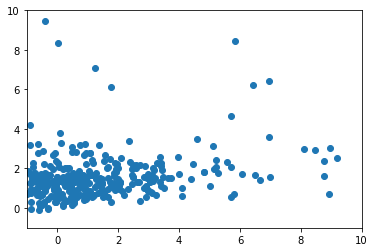

In [33]:
plt.scatter(test['price_pctchg_10YR_future'], test['predict'])
plt.ylim(-1, 10)
plt.xlim(-1, 10)
plt.show()

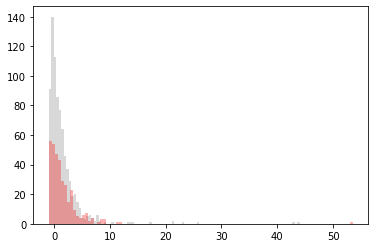

In [42]:
plt.hist(train['price_pctchg_10YR_future'], color='grey', alpha=.3, bins=100)
plt.hist(test['price_pctchg_10YR_future'], color='red', alpha=.3, bins=100)
plt.show()

### Classifiers

In [49]:
#-- Split
train_size = 800
x_cols = df2012.columns[4:110]
y_cols = ['black_or_red']

train_x, test_x, train_y, test_y = train_test_split(df2012[x_cols], df2012[y_cols], test_size=.3, random_state=32487)


print('Train Size: ', train_x.shape)
print('Test Size: ', test_x.shape)

Train Size:  (792, 106)
Test Size:  (340, 106)


In [ ]:
#-- Split
train_size = 800
x_cols = df2012.columns[4:110]
y_cols = ['price_pctchg_10YR_future']

train_x, test_x, train_y, test_y = train_test_split(df2012[x_cols], df2012[y_cols], test_size=.3, random_state=32487)


print('Train Size: ', train_x.shape)
print('Test Size: ', test_x.shape)

In [51]:
print('Train Labels: ', train_y.value_counts())
print('Test Labels: ', test_y.value_counts())

Train Labels:  black_or_red
1               542
0               250
dtype: int64
Test Labels:  black_or_red
1               239
0               101
dtype: int64


In [ ]:
#-- Train LR
model = clf_lr.fit(train_x, train_y)
preds = model.predict_proba(train_x) 
train = pd.concat([train_x, train_y], axis=1)
train['predict'] = preds
preds = model.predict_proba(test_x) 
test = pd.concat([test_x, test_y], axis=1)
test['predict'] = preds



In [ ]:
plt.scatter(test['price_pctchg_10YR_future'], test['predict'])
plt.ylim(-1, 10)
plt.xlim(-1, 10)
plt.show()

In [92]:
test[['price_pctchg_10YR_future', 'predict']].describe()

,price_pctchg_10YR_future,predict
count,1120.000000,1120.000000
mean,1.445038,-62.594567
std,3.417564,343.682613
min,-0.993208,-4796.502562
25%,-0.184494,-13.933545
50%,0.678298,1.183756
75%,2.010369,4.325385
max,53.552702,2156.820004


In [93]:
model.__dir__()

['fit_intercept',
 'normalize',
 'copy_X',
 'n_jobs',
 'positive',
 'n_features_in_',
 'coef_',
 '_residues',
 'rank_',
 'singular_',
 'intercept_',
 '__module__',
 '__doc__',
 '__init__',
 'fit',
 '__abstractmethods__',
 '_abc_impl',
 '_more_tags',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__',
 '_estimator_type',
 'score',
 '_decision_function',
 'predict',
 '_preprocess_data',
 '_set_intercept',
 '_get_param_names',
 'get_params',
 'set_params',
 '__getstate__',
 '__setstate__',
 '_get_tags',
 '_check_n_features',
 '_validate_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_']

In [16]:
revs = revs.loc[revs.index.min(): 2022]



In [9]:
df.date.dt.month.value_counts()

3     20224
12    19711
6     18944
9     18848
1      1489
4      1416
7      1364
10     1364
2       737
5       696
8       691
11      690
Name: date, dtype: int64